## Dataset

In [1]:
# imports
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from datetime import datetime
from datetime import timedelta
from dateutil.relativedelta import relativedelta
from IPython.display import display
# import os
# os.chdir('data')
from colorsetup import colors, palette
sns.set_palette(palette)
# ignore warnings
warnings.filterwarnings('ignore')
pd.options.display.float_format = '{:,.1f}'.format
%matplotlib inline
plotsize = (13, 5)

In [2]:
df = pd.read_excel("Sample - Superstore.xls")
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [3]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2013-152156,2013-11-09,2013-11-12,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,262.0,2,0.0,41.9
1,2,CA-2013-152156,2013-11-09,2013-11-12,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9,3,0.0,219.6
2,3,CA-2013-138688,2013-06-13,2013-06-17,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6,2,0.0,6.9
3,4,US-2012-108966,2012-10-11,2012-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.6,5,0.5,-383.0
4,5,US-2012-108966,2012-10-11,2012-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.4,2,0.2,2.5


In [4]:
variables = ['Order Date', 'Category', 'Sales']
group_variables = variables[:2]
outcome_variable = variables[2]

In [5]:
group_variables

['Order Date', 'Category']

In [6]:
outcome_variable

'Sales'

In [7]:
base = df.groupby(group_variables)[outcome_variable].sum().reset_index()

In [8]:
print(base.columns)
print(base.index)

Index(['Order Date', 'Category', 'Sales'], dtype='object')
RangeIndex(start=0, stop=2864, step=1)


In [9]:
base.head()

,Order Date,Category,Sales
0,2011-01-04,Office Supplies,16.4
1,2011-01-05,Office Supplies,288.1
2,2011-01-06,Office Supplies,19.5
3,2011-01-07,Furniture,"2,573.8"
4,2011-01-07,Office Supplies,685.3


In [10]:
base.dtypes

Order Date    datetime64[ns]
Category              object
Sales                float64
dtype: object

## Working with Numpy

### To numpy

In [11]:
order_date = np.array(df["Order Date"])
category = np.array(df["Category"])
sales = np.array(df["Sales"])

In [12]:
print("Order date", type(order_date), order_date.dtype)
print("Category", type(category), category.dtype)
print("Sales", type(sales), sales.dtype)

Order date <class 'numpy.ndarray'> datetime64[ns]
Category <class 'numpy.ndarray'> object
Sales <class 'numpy.ndarray'> float64


### To Pandas

In [13]:
df_from_numpy = pd.DataFrame({"Order date":order_date, "Category":category, "Sales": sales})

In [14]:
df_from_numpy.dtypes

Order date    datetime64[ns]
Category              object
Sales                float64
dtype: object

In [15]:
df_from_numpy.head()

,Order date,Category,Sales
0,2013-11-09,Furniture,262.0
1,2013-11-09,Furniture,731.9
2,2013-06-13,Office Supplies,14.6
3,2012-10-11,Furniture,957.6
4,2012-10-11,Office Supplies,22.4


In [16]:
order_date

array(['2013-11-09T00:00:00.000000000', '2013-11-09T00:00:00.000000000',
       '2013-06-13T00:00:00.000000000', ...,
       '2014-02-27T00:00:00.000000000', '2014-02-27T00:00:00.000000000',
       '2014-05-05T00:00:00.000000000'], dtype='datetime64[ns]')

In [17]:
df_from_numpy["Order date"]

0      2013-11-09
1      2013-11-09
2      2013-06-13
3      2012-10-11
4      2012-10-11
5      2011-06-09
6      2011-06-09
7      2011-06-09
8      2011-06-09
9      2011-06-09
10     2011-06-09
11     2011-06-09
12     2014-04-16
13     2013-12-06
14     2012-11-22
15     2012-11-22
16     2011-11-11
17     2011-05-13
18     2011-08-27
19     2011-08-27
20     2011-08-27
21     2013-12-10
22     2013-12-10
23     2014-07-17
24     2012-09-25
25     2013-01-16
26     2013-01-16
27     2012-09-17
28     2012-09-17
29     2012-09-17
          ...    
9964   2013-12-06
9965   2013-12-06
9966   2013-12-06
9967   2014-12-12
9968   2014-12-12
9969   2014-12-12
9970   2012-06-28
9971   2012-06-28
9972   2013-09-12
9973   2013-12-07
9974   2013-12-07
9975   2013-12-07
9976   2013-12-07
9977   2013-12-07
9978   2013-12-07
9979   2013-12-07
9980   2012-09-06
9981   2014-08-04
9982   2013-09-23
9983   2013-09-23
9984   2012-05-17
9985   2012-05-17
9986   2013-09-30
9987   2014-11-18
9988   201

In [18]:
order_date_daliy = np.array(order_date, dtype="datetime64[D]")
order_date_daliy

array(['2013-11-09', '2013-11-09', '2013-06-13', ..., '2014-02-27',
       '2014-02-27', '2014-05-05'], dtype='datetime64[D]')

In [19]:
order_date_month = np.array(order_date, dtype="datetime64[M]")
order_date_month

array(['2013-11', '2013-11', '2013-06', ..., '2014-02', '2014-02',
       '2014-05'], dtype='datetime64[M]')

In [20]:
order_date_year = np.array(order_date, dtype="datetime64[Y]")
order_date_year

array(['2013', '2013', '2013', ..., '2014', '2014', '2014'],
      dtype='datetime64[Y]')

In [21]:
np.unique(order_date_month)

array(['2011-01', '2011-02', '2011-03', '2011-04', '2011-05', '2011-06',
       '2011-07', '2011-08', '2011-09', '2011-10', '2011-11', '2011-12',
       '2012-01', '2012-02', '2012-03', '2012-04', '2012-05', '2012-06',
       '2012-07', '2012-08', '2012-09', '2012-10', '2012-11', '2012-12',
       '2013-01', '2013-02', '2013-03', '2013-04', '2013-05', '2013-06',
       '2013-07', '2013-08', '2013-09', '2013-10', '2013-11', '2013-12',
       '2014-01', '2014-02', '2014-03', '2014-04', '2014-05', '2014-06',
       '2014-07', '2014-08', '2014-09', '2014-10', '2014-11', '2014-12'],
      dtype='datetime64[M]')

In [22]:
len(np.unique(order_date_month))

48

## Working with pandas

In [23]:
base.head()

,Order Date,Category,Sales
0,2011-01-04,Office Supplies,16.4
1,2011-01-05,Office Supplies,288.1
2,2011-01-06,Office Supplies,19.5
3,2011-01-07,Furniture,"2,573.8"
4,2011-01-07,Office Supplies,685.3


In [24]:
print(base["Category"].unique())

['Office Supplies' 'Furniture' 'Technology']


### Set Index

In [25]:
base.set_index("Order Date", inplace=True)

In [26]:
base.head()

,Category,Sales
Order Date,,
2011-01-04,Office Supplies,16.4
2011-01-05,Office Supplies,288.1
2011-01-06,Office Supplies,19.5
2011-01-07,Furniture,"2,573.8"
2011-01-07,Office Supplies,685.3


In [27]:
base.index

DatetimeIndex(['2011-01-04', '2011-01-05', '2011-01-06', '2011-01-07',
               '2011-01-07', '2011-01-07', '2011-01-08', '2011-01-08',
               '2011-01-10', '2011-01-10',
               ...
               '2014-12-28', '2014-12-29', '2014-12-29', '2014-12-29',
               '2014-12-30', '2014-12-30', '2014-12-30', '2014-12-31',
               '2014-12-31', '2014-12-31'],
              dtype='datetime64[ns]', name='Order Date', length=2864, freq=None)

### Subsetting data

In [28]:
base["2011"].head()

,Category,Sales
Order Date,,
2011-01-04,Office Supplies,16.4
2011-01-05,Office Supplies,288.1
2011-01-06,Office Supplies,19.5
2011-01-07,Furniture,"2,573.8"
2011-01-07,Office Supplies,685.3


In [29]:
base["2011"]

,Category,Sales
Order Date,,
2011-01-04,Office Supplies,16.4
2011-01-05,Office Supplies,288.1
2011-01-06,Office Supplies,19.5
2011-01-07,Furniture,"2,573.8"
2011-01-07,Office Supplies,685.3
2011-01-07,Technology,"1,147.9"
2011-01-08,Furniture,76.7
2011-01-08,Office Supplies,10.4
2011-01-10,Office Supplies,9.3


In [30]:
base['2011':'2012-01']

,Category,Sales
Order Date,,
2011-01-04,Office Supplies,16.4
2011-01-05,Office Supplies,288.1
2011-01-06,Office Supplies,19.5
2011-01-07,Furniture,"2,573.8"
2011-01-07,Office Supplies,685.3
2011-01-07,Technology,"1,147.9"
2011-01-08,Furniture,76.7
2011-01-08,Office Supplies,10.4
2011-01-10,Office Supplies,9.3


In [31]:
base[base['Category'] == 'Office Supplies']

,Category,Sales
Order Date,,
2011-01-04,Office Supplies,16.4
2011-01-05,Office Supplies,288.1
2011-01-06,Office Supplies,19.5
2011-01-07,Office Supplies,685.3
2011-01-08,Office Supplies,10.4
2011-01-10,Office Supplies,9.3
2011-01-11,Office Supplies,2.9
2011-01-14,Office Supplies,"2,027.1"
2011-01-17,Office Supplies,48.7


In [32]:
print(base[base['Category'] == 'Office Supplies']['2011':'2012-02'])

                   Category   Sales
Order Date                         
2011-01-04  Office Supplies    16.4
2011-01-05  Office Supplies   288.1
2011-01-06  Office Supplies    19.5
2011-01-07  Office Supplies   685.3
2011-01-08  Office Supplies    10.4
2011-01-10  Office Supplies     9.3
2011-01-11  Office Supplies     2.9
2011-01-14  Office Supplies 2,027.1
2011-01-17  Office Supplies    48.7
2011-01-19  Office Supplies    64.9
2011-01-20  Office Supplies   197.1
2011-01-21  Office Supplies   560.4
2011-01-24  Office Supplies    46.0
2011-01-27  Office Supplies   536.7
2011-01-28  Office Supplies    93.7
2011-01-29  Office Supplies     3.9
2011-01-31  Office Supplies   240.5
2011-02-03  Office Supplies    30.7
2011-02-04  Office Supplies    97.1
2011-02-05  Office Supplies   134.4
2011-02-07  Office Supplies    24.0
2011-02-08  Office Supplies    65.0
2011-02-12  Office Supplies   158.9
2011-02-15  Office Supplies   336.8
2011-02-16  Office Supplies    21.4
2011-02-17  Office Supplies 

### Datetime Components

In [33]:
base.index.day

Int64Index([ 4,  5,  6,  7,  7,  7,  8,  8, 10, 10,
            ...
            28, 29, 29, 29, 30, 30, 30, 31, 31, 31],
           dtype='int64', name='Order Date', length=2864)

In [34]:
base.index.week

Int64Index([ 1,  1,  1,  1,  1,  1,  1,  1,  2,  2,
            ...
            52,  1,  1,  1,  1,  1,  1,  1,  1,  1],
           dtype='int64', name='Order Date', length=2864)

In [35]:
base.index.dayofweek

Int64Index([1, 2, 3, 4, 4, 4, 5, 5, 0, 0,
            ...
            6, 0, 0, 0, 1, 1, 1, 2, 2, 2],
           dtype='int64', name='Order Date', length=2864)

## Standardizing the DatetimeIndex

### Pivoting Data

In [36]:
base.reset_index(inplace=True)

In [37]:
base.head()

,Order Date,Category,Sales
0,2011-01-04,Office Supplies,16.4
1,2011-01-05,Office Supplies,288.1
2,2011-01-06,Office Supplies,19.5
3,2011-01-07,Furniture,"2,573.8"
4,2011-01-07,Office Supplies,685.3


In [38]:
sales_pivot = base.pivot(index='Order Date', columns='Category', values='Sales')

In [39]:
sales_pivot.head()

Category,Furniture,Office Supplies,Technology
Order Date,,,
2011-01-04,nan,16.4,nan
2011-01-05,nan,288.1,nan
2011-01-06,nan,19.5,nan
2011-01-07,"2,573.8",685.3,"1,147.9"
2011-01-08,76.7,10.4,nan


### unstack

In [40]:
base.set_index(['Order Date','Category'])

Sales
Order Date Category               
2011-01-04 Office Supplies    16.4
2011-01-05 Office Supplies   288.1
2011-01-06 Office Supplies    19.5
2011-01-07 Furniture       2,573.8
           Office Supplies   685.3
           Technology      1,147.9
2011-01-08 Furniture          76.7
           Office Supplies    10.4
2011-01-10 Office Supplies     9.3
           Technology         31.2
2011-01-11 Furniture          51.9
           Office Supplies     2.9
2011-01-12 Furniture           9.9
2011-01-14 Furniture         879.9
           Office Supplies 2,027.1
           Technology        646.7
2011-01-15 Furniture          62.0
2011-01-16 Technology        149.9
2011-01-17 Furniture         127.1
           Office Supplies    48.7
           Technology        124.2
2011-01-19 Office Supplies    64.9
2011-01-20 Furniture         181.5
           Office Supplies   197.1
2011-01-21 Furniture       1,413.5
           Office Supplies   560.4
           Technology        699.9
2011-01-22 Furniture          25.2
2011-01-24 Office Supplies    46.0
2011-01-27 Furniture         217.2
...                            ...
2014-12-20 Furniture         115.4
           Office Supplies 1,780.5
2014-12-21 Office Supplies   377.7
2014-12-22 Furniture          15.9
           Office Supplies 1,772.1
           Technology        353.0
2014-12-23 Furniture       4,086.5
           Office Supplies 1,851.8
           Technology      1,503.8
2014-12-24 Furniture         282.1
           Office Supplies 1,149.7
           Technology        495.0
2014-12-25 Furniture       1,393.5
           Office Supplies 1,479.6
           Technology      3,359.9
2014-12-26 Furniture         832.5
           Office Supplies 1,465.3
           Technology        401.2
2014-12-27 Office Supplies   814.6
2014-12-28 Office Supplies    13.2
           Technology        164.4
2014-12-29 Furniture         551.3
           Office Supplies 1,091.2
           Technology         14.9
2014-12-30 Furniture       2,330.7
           Office Supplies   282.4
           Technology        302.4
2014-12-31 Furniture         323.1
           Office Supplies   299.7
           Technology         90.9

[2864 rows x 1 columns]

In [41]:
base.set_index(['Order Date','Category']).unstack('Category').head()

Sales                           
Category   Furniture Office Supplies Technology
Order Date                                     
2011-01-04       nan            16.4        nan
2011-01-05       nan           288.1        nan
2011-01-06       nan            19.5        nan
2011-01-07   2,573.8           685.3    1,147.9
2011-01-08      76.7            10.4        nan

In [42]:
base.set_index(['Order Date', 'Category']).unstack('Category').fillna(0)

Sales                           
Category   Furniture Office Supplies Technology
Order Date                                     
2011-01-04       0.0            16.4        0.0
2011-01-05       0.0           288.1        0.0
2011-01-06       0.0            19.5        0.0
2011-01-07   2,573.8           685.3    1,147.9
2011-01-08      76.7            10.4        0.0
2011-01-10       0.0             9.3       31.2
2011-01-11      51.9             2.9        0.0
2011-01-12       9.9             0.0        0.0
2011-01-14     879.9         2,027.1      646.7
2011-01-15      62.0             0.0        0.0
2011-01-16       0.0             0.0      149.9
2011-01-17     127.1            48.7      124.2
2011-01-19       0.0            64.9        0.0
2011-01-20     181.5           197.1        0.0
2011-01-21   1,413.5           560.4      699.9
2011-01-22      25.2             0.0        0.0
2011-01-24       0.0            46.0        0.0
2011-01-27     217.2           536.7      343.3
2011-01-28     333.0            93.7        0.0
2011-01-29       0.0             3.9        0.0
2011-01-31       0.0           240.5        0.0
2011-02-01     290.7             0.0        0.0
2011-02-02       0.0             0.0      468.9
2011-02-03       0.0            30.7      181.0
2011-02-04       0.0            97.1        0.0
2011-02-05       0.0           134.4        0.0
2011-02-07       0.0            24.0      306.6
2011-02-08       0.0            65.0      115.4
2011-02-09      14.6             0.0        0.0
2011-02-12   1,650.1           158.9      234.5
...              ...             ...        ...
2014-12-01   4,129.7         1,417.6    1,098.0
2014-12-02   2,542.3         1,371.5    1,417.4
2014-12-03   3,527.5         2,665.6    3,758.1
2014-12-04     591.8           447.9      364.1
2014-12-05     992.8           199.1    1,447.7
2014-12-06     321.5           796.1      335.6
2014-12-07       0.0            10.7        0.0
2014-12-08      82.4         2,279.8      554.4
2014-12-09   3,368.3         2,632.8    1,642.0
2014-12-10   1,927.2         1,447.1    2,096.1
2014-12-11   2,102.3           973.2      798.1
2014-12-12   1,448.5           899.7      475.7
2014-12-14     489.0            91.9        0.0
2014-12-15   1,852.5           320.7    1,724.5
2014-12-16      22.8            87.3      196.8
2014-12-17     197.7           321.1      339.9
2014-12-18     629.3         1,398.5        0.0
2014-12-19   1,380.7         2,115.9      149.3
2014-12-20     115.4         1,780.5        0.0
2014-12-21       0.0           377.7        0.0
2014-12-22      15.9         1,772.1      353.0
2014-12-23   4,086.5         1,851.8    1,503.8
2014-12-24     282.1         1,149.7      495.0
2014-12-25   1,393.5         1,479.6    3,359.9
2014-12-26     832.5         1,465.3      401.2
2014-12-27       0.0           814.6        0.0
2014-12-28       0.0            13.2      164.4
2014-12-29     551.3         1,091.2       14.9
2014-12-30   2,330.7           282.4      302.4
2014-12-31     323.1           299.7       90.9

[1238 rows x 3 columns]

In [43]:
sales = base.set_index(['Order Date','Category']).unstack('Category').fillna(0)
sales.columns = sales.columns.levels[1].rename(None)
sales.head()

,Furniture,Office Supplies,Technology
Order Date,,,
2011-01-04,0.0,16.4,0.0
2011-01-05,0.0,288.1,0.0
2011-01-06,0.0,19.5,0.0
2011-01-07,"2,573.8",685.3,"1,147.9"
2011-01-08,76.7,10.4,0.0


In [44]:
sales.index

DatetimeIndex(['2011-01-04', '2011-01-05', '2011-01-06', '2011-01-07',
               '2011-01-08', '2011-01-10', '2011-01-11', '2011-01-12',
               '2011-01-14', '2011-01-15',
               ...
               '2014-12-22', '2014-12-23', '2014-12-24', '2014-12-25',
               '2014-12-26', '2014-12-27', '2014-12-28', '2014-12-29',
               '2014-12-30', '2014-12-31'],
              dtype='datetime64[ns]', name='Order Date', length=1238, freq=None)

In [45]:
print("Unique days:", len(sales.index.unique()), 'days')

Unique days: 1238 days


### Generating a complete Index and Setting Frequency

In [46]:
print('\nUnique dates in our data: ', len(sales.index.unique()), 'Days')
our_date_range = sales.index.max() - sales.index.min()
# Calculate number of days in date range
print('Total days in our date range:', our_date_range.days, 'Days')


Unique dates in our data:  1238 Days
Total days in our date range: 1457 Days


In [47]:
new_index = pd.date_range(sales.index.min(), sales.index.max())
new_index

DatetimeIndex(['2011-01-04', '2011-01-05', '2011-01-06', '2011-01-07',
               '2011-01-08', '2011-01-09', '2011-01-10', '2011-01-11',
               '2011-01-12', '2011-01-13',
               ...
               '2014-12-22', '2014-12-23', '2014-12-24', '2014-12-25',
               '2014-12-26', '2014-12-27', '2014-12-28', '2014-12-29',
               '2014-12-30', '2014-12-31'],
              dtype='datetime64[ns]', length=1458, freq='D')

In [48]:
sales_new = sales.reindex(new_index, fill_value=0)


In [49]:
sales_new.index

DatetimeIndex(['2011-01-04', '2011-01-05', '2011-01-06', '2011-01-07',
               '2011-01-08', '2011-01-09', '2011-01-10', '2011-01-11',
               '2011-01-12', '2011-01-13',
               ...
               '2014-12-22', '2014-12-23', '2014-12-24', '2014-12-25',
               '2014-12-26', '2014-12-27', '2014-12-28', '2014-12-29',
               '2014-12-30', '2014-12-31'],
              dtype='datetime64[ns]', length=1458, freq='D')

## Resampling

### Upsampling (Moving to a longer period)

In [50]:
sales_weekly = sales_new.resample("W").sum()
sales_weekly.head()

,Furniture,Office Supplies,Technology
2011-01-09,"2,650.5","1,019.8","1,147.9"
2011-01-16,"1,003.8","2,039.4",827.9
2011-01-23,"1,747.3",871.1,824.1
2011-01-30,550.2,680.3,343.3
2011-02-06,290.7,502.7,649.9


In [51]:
sales_monthly = sales_new.resample("M").sum()
sales_monthly.head()

,Furniture,Office Supplies,Technology
2011-01-31,"5,951.9","4,851.1","3,143.3"
2011-02-28,"2,130.3","1,071.7","1,608.5"
2011-03-31,"14,574.0","8,605.9","32,511.2"
2011-04-30,"7,944.8","11,155.1","9,195.4"
2011-05-31,"6,912.8","7,135.6","9,599.9"


In [52]:
sales_quarterly = sales_new.resample('Q').sum()
print('Quarterly Sales')
print(sales_quarterly.head(), '\n')

sales_annual = sales_new.resample('Y').sum()
print('Annual Sales')
print(sales_annual.head())

Quarterly Sales
            Furniture  Office Supplies  Technology
2011-03-31   22,656.1         14,528.7    37,263.0
2011-06-30   28,063.7         31,243.7    27,231.3
2011-09-30   41,957.9         53,924.0    47,751.4
2011-12-31   64,515.1         52,080.0    63,032.6
2012-03-31   27,374.1         23,059.4    18,418.2 

Annual Sales
            Furniture  Office Supplies  Technology
2011-12-31  157,192.9        151,776.4   175,278.2
2012-12-31  170,518.2        137,233.5   162,780.8
2013-12-31  198,901.4        183,510.6   226,061.8
2014-12-31  215,387.3        246,526.6   272,033.2


### Downsampling (moving to a shorter period)

In [53]:
sales_annual.resample('M')

DatetimeIndexResampler [freq=<MonthEnd>, axis=0, closed=right, label=right, convention=start, base=0]

In [54]:
# Note that downsampling (from Annual to Monthly for example) produces missing values:
sales_monthly_from_annual = sales_annual.resample('M')
#print('Monthly from Annual Sales')
#sales_monthly_from_annual.interpolate(method='linear').head()
print(sales_monthly_from_annual.interpolate(method='spline', order=3).head())

            Furniture  Office Supplies  Technology
2011-12-31  157,192.9        151,776.4   175,278.2
2012-01-31  157,062.6        147,084.7   168,957.8
2012-02-29  157,200.9        143,355.5   164,096.2
2012-03-31  157,611.1        140,049.0   159,969.0
2012-04-30  158,251.0        137,493.3   156,975.1


### Resampling by changing frequency directly

In [55]:
sales_daily = sales.asfreq('D')
sales_businessday = sales.asfreq('B')
sales_hourly = sales.asfreq('h')
# This will generate missing values:
sales_hourly.head()

,Furniture,Office Supplies,Technology
Order Date,,,
2011-01-04 00:00:00,0.0,16.4,0.0
2011-01-04 01:00:00,nan,nan,nan
2011-01-04 02:00:00,nan,nan,nan
2011-01-04 03:00:00,nan,nan,nan
2011-01-04 04:00:00,nan,nan,nan


## Variable Transformations

### Stationarity Transformations

In [56]:
# Variable First Difference
print('Monthly Sales, First Difference \n', sales_monthly.diff().head())

# Variable Percent Change
print('\nMonthly Sales % Change \n', sales_monthly.pct_change().head())

# Log Sales
print('\nlog(1+Monthly Sales) \n', np.log(1 +  sales_monthly).head())

# Add % change to original data:
sales_monthly.join(sales_monthly.pct_change().add_suffix('_%_Change')).head()

Monthly Sales, First Difference 
             Furniture  Office Supplies  Technology
2011-01-31        nan              nan         nan
2011-02-28   -3,821.5         -3,779.4    -1,534.8
2011-03-31   12,443.6          7,534.2    30,902.7
2011-04-30   -6,629.1          2,549.2   -23,315.7
2011-05-31   -1,032.1         -4,019.4       404.4

Monthly Sales % Change 
             Furniture  Office Supplies  Technology
2011-01-31        nan              nan         nan
2011-02-28       -0.6             -0.8        -0.5
2011-03-31        5.8              7.0        19.2
2011-04-30       -0.5              0.3        -0.7
2011-05-31       -0.1             -0.4         0.0

log(1+Monthly Sales) 
             Furniture  Office Supplies  Technology
2011-01-31        8.7              8.5         8.1
2011-02-28        7.7              7.0         7.4
2011-03-31        9.6              9.1        10.4
2011-04-30        9.0              9.3         9.1
2011-05-31        8.8              8.9         9.

,Furniture,Office Supplies,Technology,Furniture_%_Change,Office Supplies_%_Change,Technology_%_Change
2011-01-31,"5,951.9","4,851.1","3,143.3",nan,nan,nan
2011-02-28,"2,130.3","1,071.7","1,608.5",-0.6,-0.8,-0.5
2011-03-31,"14,574.0","8,605.9","32,511.2",5.8,7.0,19.2
2011-04-30,"7,944.8","11,155.1","9,195.4",-0.5,0.3,-0.7
2011-05-31,"6,912.8","7,135.6","9,599.9",-0.1,-0.4,0.0


### Rolling Averages and Windows

In [57]:
window_size = 7
rolling_window = sales_new.rolling(window_size)
print('Rolling Mean')
print(rolling_window.mean().dropna().head())
print('\nRolling St. Dev')
print(rolling_window.std().dropna().head())
print('\nCumulative Sales')
print(sales_new.cumsum().dropna().head())

Rolling Mean
            Furniture  Office Supplies  Technology
2011-01-10      378.6            147.0       168.4
2011-01-11      386.1            145.1       168.4
2011-01-12      387.5            103.9       168.4
2011-01-13      387.5            101.1       168.4
2011-01-14      145.5            292.8        96.8

Rolling St. Dev
            Furniture  Office Supplies  Technology
2011-01-10      968.4            258.9       432.1
2011-01-11      965.2            260.1       432.1
2011-01-12      964.6            256.5       432.1
2011-01-13      964.6            257.6       432.1
2011-01-14      325.3            764.8       242.8

Cumulative Sales
            Furniture  Office Supplies  Technology
2011-01-04        0.0             16.4         0.0
2011-01-05        0.0            304.5         0.0
2011-01-06        0.0            324.0         0.0
2011-01-07    2,573.8          1,009.4     1,147.9
2011-01-08    2,650.5          1,019.8     1,147.9


## Visualization

### Pandas Built-in Plotting

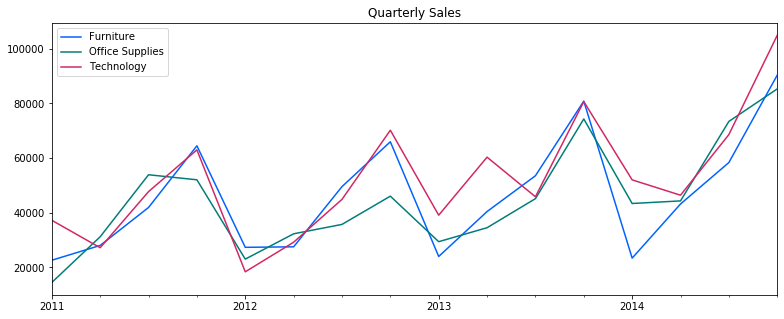

In [58]:
sales_quarterly.plot(figsize=plotsize, title="Quarterly Sales")

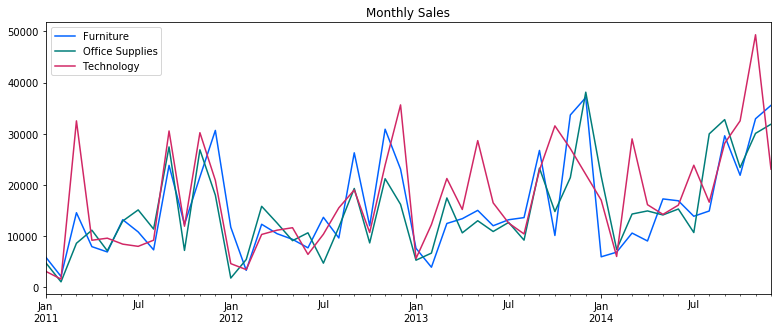

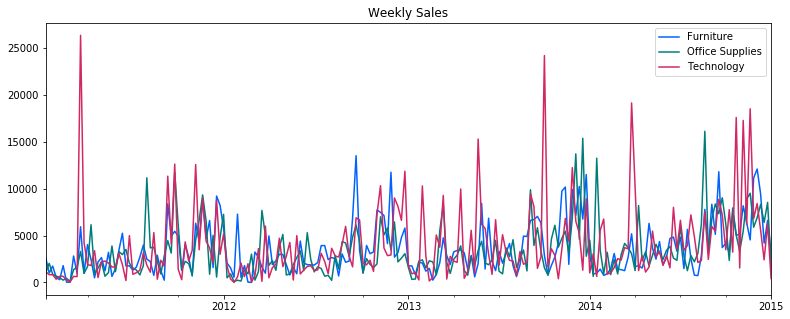

In [59]:
sales_monthly.plot(figsize=plotsize, title='Monthly Sales')
#plt.title('Monthly Sales')
sales_weekly.plot(figsize=plotsize, title='Weekly Sales')
#plt.title('Monthly Sales')

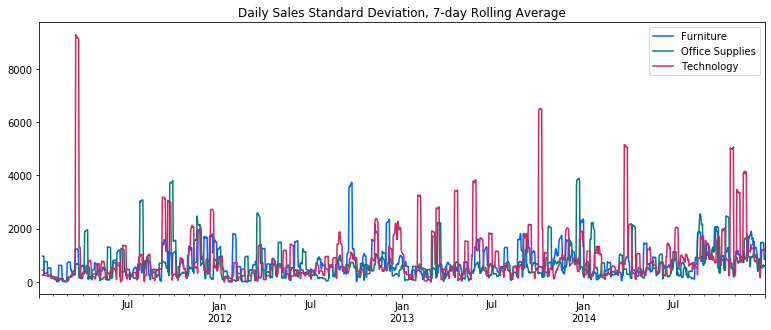

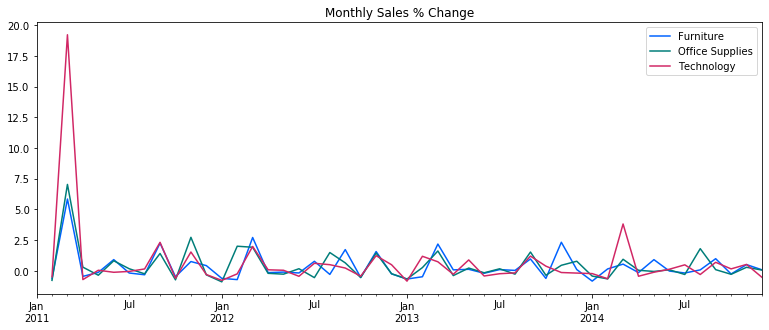

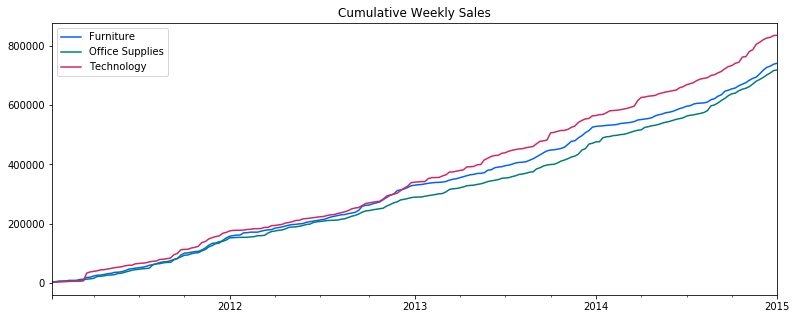

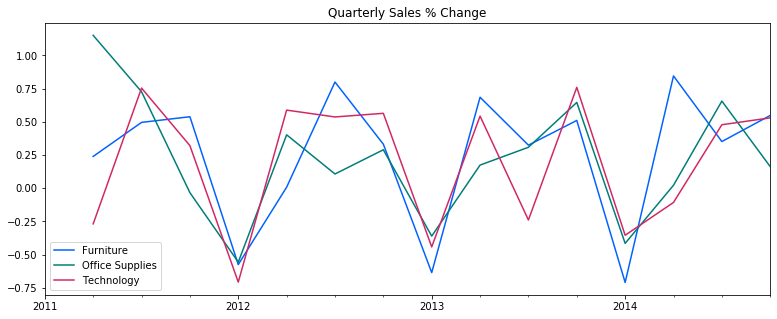

In [60]:
#rolling_window.mean().plot(figsize=plotsize, title='Daily Sales, 7-day Rolling Average')
rolling_window.std().plot(figsize=plotsize, title='Daily Sales Standard Deviation, 7-day Rolling Average')

# Monthly Sales Percent Change
sales_monthly.pct_change().plot(figsize=plotsize, title='Monthly Sales % Change')

# Cumulative Weekly Sales
sales_weekly.cumsum().plot(figsize=plotsize, title='Cumulative Weekly Sales')

# Quarterly Sales Growth
sales_quarterly.pct_change().plot(figsize=plotsize, title='Quarterly Sales % Change')

## Time Series Visualizations

In [61]:
sales_new.head()

,Furniture,Office Supplies,Technology
2011-01-04,0.0,16.4,0.0
2011-01-05,0.0,288.1,0.0
2011-01-06,0.0,19.5,0.0
2011-01-07,"2,573.8",685.3,"1,147.9"
2011-01-08,76.7,10.4,0.0


In [62]:
sales_new.index

DatetimeIndex(['2011-01-04', '2011-01-05', '2011-01-06', '2011-01-07',
               '2011-01-08', '2011-01-09', '2011-01-10', '2011-01-11',
               '2011-01-12', '2011-01-13',
               ...
               '2014-12-22', '2014-12-23', '2014-12-24', '2014-12-25',
               '2014-12-26', '2014-12-27', '2014-12-28', '2014-12-29',
               '2014-12-30', '2014-12-31'],
              dtype='datetime64[ns]', length=1458, freq='D')

Daily data Autocorrelation Plots


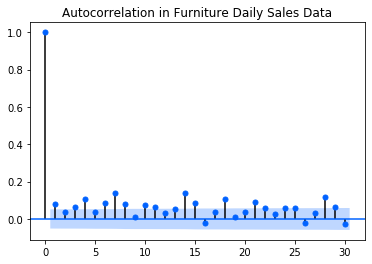

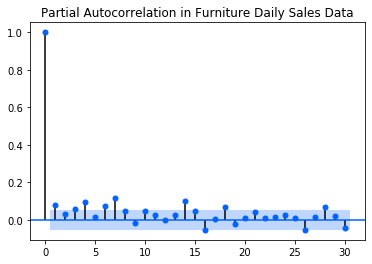

In [63]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf, month_plot, quarter_plot

print('Daily data Autocorrelation Plots')
# Autocorrelation and Partial Autocorrelation Functions for Daily Data
#plot_acf(sales_new['Sales']['Furniture'])
acf_plot = plot_acf(sales_new['Furniture'], lags=30, title='Autocorrelation in Furniture Daily Sales Data')
#plot_acf(sales_new['Sales']['Furniture'])
pacf_plot = plot_pacf(sales_new['Furniture'], lags=30, title='Partial Autocorrelation in Furniture Daily Sales Data')
#plot_acf(sales_new['Sales']['Furniture'])


Weekly data Autocorrelation Plots


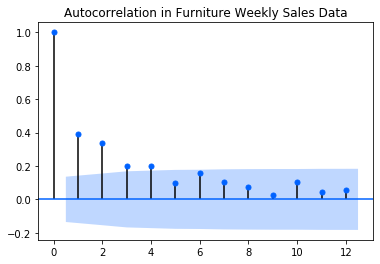

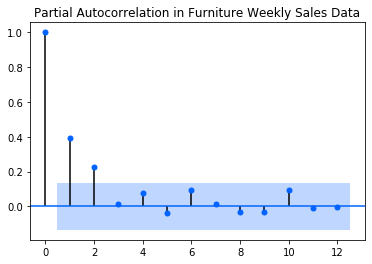

In [64]:
print('\nWeekly data Autocorrelation Plots')
# Autocorrelation and Partial Autocorrelation Functions for Daily Data
#plot_acf(sales_new['Sales']['Furniture'])
acf_plot = plot_acf(sales_weekly['Furniture'], lags=12, title='Autocorrelation in Furniture Weekly Sales Data')
#plot_acf(sales_new['Sales']['Furniture'])
pacf_plot = plot_pacf(sales_weekly['Furniture'], lags=12, title='Partial Autocorrelation in Furniture Weekly Sales Data')
#plot_acf(sales_new['Sales']['Furniture'])


Monthly Data Seasonal Plot


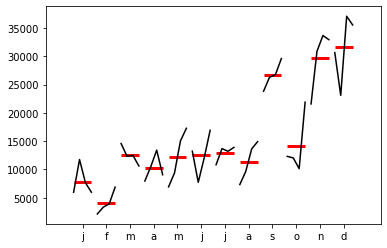

In [65]:
print('\nMonthly Data Seasonal Plot')
m_plot = month_plot(sales_monthly['Furniture'])


Quarterly Data Seasonal Plot


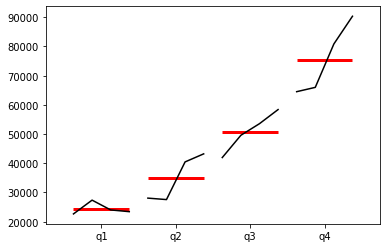

In [66]:
print('\nQuarterly Data Seasonal Plot')
q_plot = quarter_plot(sales_quarterly['Furniture'])

## Exercises
### Exercise 1:

In [67]:
base.columns

Index(['Order Date', 'Category', 'Sales'], dtype='object')